In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from collections import Counter

%matplotlib inline

In [5]:
def run_beta_skel(pos_filename, beta=1.0):
    skel = "./LSS_BSK_calc "
    in_filename = "/Users/forero/github/cosmo_datasets/abacus/"+pos_filename
    out_filename =  "beta_{:.1f}_{}".format(beta, pos_filename)
    index_filename = "xdl_beta_skeleton/{}.BSKIndex".format(out_filename)
    if not os.path.exists(index_filename):
        cmd = "./LSS_BSK_calc -beta {} -numNNB {} -input {}  -output {}".format(beta, 50, in_filename, out_filename)
        print(cmd)
        os.system(cmd)
    return index_filename, in_filename


def get_entropy_beta_skel(in_filename, index_filename):
    beta_data = np.int_(np.loadtxt(index_filename))
    point_data = np.loadtxt(in_filename)
    
    # remove the duplicate points using the fact that the first column is ordered in ngl-beta
    ii = beta_data[:,0]<beta_data[:,1]
    beta_data = beta_data[ii]

    n_points = len(point_data)
    #print(n_points)

    # Flattend and count links
    beta_data_flat = beta_data.flatten()
    beta_link_count = Counter(Counter(beta_data_flat).values())

    # Count how many points have zero links
    unique_beta_id = len(set(beta_data_flat))
    if (n_points - unique_beta_id)>0:
        beta_link_count[0] = n_points - unique_beta_id

    assert np.sum(list(beta_link_count.values()))==n_points
    # compute probability array
    proba = []
    total_link = np.sum(list(beta_link_count.values()))
    for k in beta_link_count:
        #print(k, beta_link_count[k]/total_link)
        proba.append(beta_link_count[k]/total_link)
    proba = np.array(proba)
    print(proba, proba.sum())
    entropy = np.sum(-proba*np.log(proba)/np.log10(2))
    print('Entropy', entropy)
    return entropy

In [84]:
z_list = ["0.100", "0.300", "0.500", "0.700", "1.000", "1.500"]
beta_values = [1.0, 2.0, 3.0]

index_files = {}
in_files = {}

for i in beta_values:
    index_files[i] = {}
    in_files[i] = {}
for z in z_list:
    pos_filename = "sphere_00_stdcosmo_norsd_z{}.dat".format(z)
    for i in beta_values:
        index_files[i][z], in_files[i][z] = run_beta_skel(pos_filename, beta=i)
        
random_index_files = {}
random_in_files = {}

for i in beta_values:
    random_index_files[i] = {}
    random_in_files[i] = {}
for z in z_list:
    pos_filename = "random_sphere_00_stdcosmo_norsd_z{}.dat".format(z)
    for i in beta_values:
        random_index_files[i][z], random_in_files[i][z] = run_beta_skel(pos_filename, beta=i)
        

./LSS_BSK_calc -beta 1.0 -numNNB 50 -input /Users/forero/github/cosmo_datasets/abacus/random_sphere_00_stdcosmo_norsd_z0.100.dat  -output beta_1.0_random_sphere_00_stdcosmo_norsd_z0.100.dat
./LSS_BSK_calc -beta 2.0 -numNNB 50 -input /Users/forero/github/cosmo_datasets/abacus/random_sphere_00_stdcosmo_norsd_z0.100.dat  -output beta_2.0_random_sphere_00_stdcosmo_norsd_z0.100.dat
./LSS_BSK_calc -beta 3.0 -numNNB 50 -input /Users/forero/github/cosmo_datasets/abacus/random_sphere_00_stdcosmo_norsd_z0.100.dat  -output beta_3.0_random_sphere_00_stdcosmo_norsd_z0.100.dat
./LSS_BSK_calc -beta 1.0 -numNNB 50 -input /Users/forero/github/cosmo_datasets/abacus/random_sphere_00_stdcosmo_norsd_z0.300.dat  -output beta_1.0_random_sphere_00_stdcosmo_norsd_z0.300.dat
./LSS_BSK_calc -beta 2.0 -numNNB 50 -input /Users/forero/github/cosmo_datasets/abacus/random_sphere_00_stdcosmo_norsd_z0.300.dat  -output beta_2.0_random_sphere_00_stdcosmo_norsd_z0.300.dat
./LSS_BSK_calc -beta 3.0 -numNNB 50 -input /Users/

In [85]:
entropy_values = {}
for i in beta_values:
    entropy_values[i] = []
    
for z in z_list:
    for i in beta_values:
        entropy_values[i].append(get_entropy_beta_skel(in_files[i][z], index_files[i][z]))
        
random_entropy_values = {}
for i in beta_values:
    random_entropy_values[i] = []
    
for z in z_list:
    for i in beta_values:
        random_entropy_values[i].append(get_entropy_beta_skel(random_in_files[i][z], random_index_files[i][z]))

[4.19270333e-02 7.46851567e-02 1.22440396e-01 1.80361950e-01
 1.97522111e-01 2.07532205e-02 1.05268218e-02 2.18864161e-01
 1.03045087e-01 2.40338396e-03 5.31147856e-03 1.98880023e-02
 4.32609114e-04 1.04547202e-03 8.41184388e-05 3.84541434e-04
 2.64372236e-04 1.20169198e-05 2.40338396e-05 1.20169198e-05
 1.20169198e-05] 1.0
Entropy 6.795492686790359
[4.43123918e-01 1.18090271e-01 3.92532686e-01 3.71082484e-02
 8.92857143e-03 2.16304557e-04] 1.0
Entropy 3.8075793174616863
[5.01201692e-01 2.07063545e-01 2.40963276e-01 1.61026726e-02
 1.32186118e-04 3.45366276e-02] 1.0
Entropy 3.983310262396371
[2.19233579e-01 1.77392575e-01 1.20874012e-01 1.97870315e-01
 7.45168360e-02 2.17174736e-02 1.04336853e-01 4.22505590e-02
 2.07433973e-02 5.36848863e-03 1.11022559e-02 5.53452436e-05
 1.15118107e-03 2.25808594e-03 9.96214385e-05 4.98107193e-04
 4.42761949e-04 6.64142924e-05 2.21380975e-05] 1.0000000000000002
Entropy 6.813821796268463
[3.91479046e-01 9.06555091e-03 4.43846716e-01 1.18804100e-01
 3.6

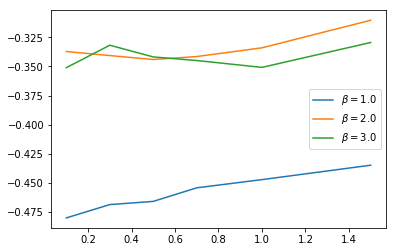

In [86]:
z_numbers = np.float_(np.array(z_list))
plt.plot(z_numbers, np.array(entropy_values[1.0])-np.array(random_entropy_values[1.0]), label=r"$\beta=1.0$")
plt.plot(z_numbers, np.array(entropy_values[2.0])-np.array(random_entropy_values[2.0]), label=r"$\beta=2.0$")
plt.plot(z_numbers, np.array(entropy_values[3.0])-np.array(random_entropy_values[3.0]), label=r"$\beta=3.0$")
plt.legend()

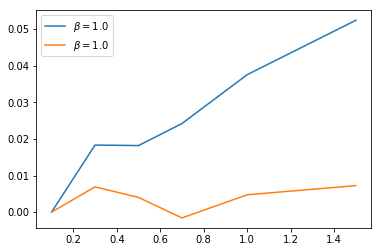

In [96]:
z_numbers = np.float_(np.array(z_list))
plt.plot(z_numbers, np.array(entropy_values[1.0])-entropy_values[1.0][0], label=r"$\beta=1.0$")
plt.plot(z_numbers, np.array(random_entropy_values[1.0])-random_entropy_values[1.0][0], label=r"$\beta=1.0$")
plt.legend()

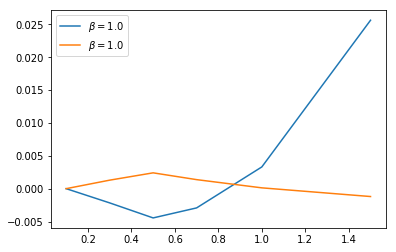

In [97]:
z_numbers = np.float_(np.array(z_list))
plt.plot(z_numbers, np.array(entropy_values[2.0])-entropy_values[2.0][0], label=r"$\beta=1.0$")
plt.plot(z_numbers, np.array(random_entropy_values[2.0])-random_entropy_values[2.0][0], label=r"$\beta=1.0$")
plt.legend()

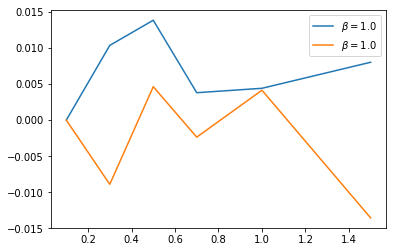

In [98]:
z_numbers = np.float_(np.array(z_list))
plt.plot(z_numbers, np.array(entropy_values[3.0])-entropy_values[3.0][0], label=r"$\beta=1.0$")
plt.plot(z_numbers, np.array(random_entropy_values[3.0])-random_entropy_values[3.0][0], label=r"$\beta=1.0$")
plt.legend()

In [109]:
z_list = ["0.100"]
beta_values = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

index_files = {}
in_files = {}

for i in beta_values:
    index_files[i] = {}
    in_files[i] = {}
for z in z_list:
    pos_filename = "sphere_00_stdcosmo_norsd_z{}.dat".format(z)
    for i in beta_values:
        index_files[i][z], in_files[i][z] = run_beta_skel(pos_filename, beta=i)
        

random_index_files = {}
random_in_files = {}

for i in beta_values:
    random_index_files[i] = {}
    random_in_files[i] = {}
for z in z_list:
    pos_filename = "random_sphere_00_stdcosmo_norsd_z{}.dat".format(z)
    for i in beta_values:
        random_index_files[i][z], random_in_files[i][z] = run_beta_skel(pos_filename, beta=i)

./LSS_BSK_calc -beta 1.5 -numNNB 50 -input /Users/forero/github/cosmo_datasets/abacus/random_sphere_00_stdcosmo_norsd_z0.100.dat  -output beta_1.5_random_sphere_00_stdcosmo_norsd_z0.100.dat
./LSS_BSK_calc -beta 2.5 -numNNB 50 -input /Users/forero/github/cosmo_datasets/abacus/random_sphere_00_stdcosmo_norsd_z0.100.dat  -output beta_2.5_random_sphere_00_stdcosmo_norsd_z0.100.dat
./LSS_BSK_calc -beta 3.5 -numNNB 50 -input /Users/forero/github/cosmo_datasets/abacus/random_sphere_00_stdcosmo_norsd_z0.100.dat  -output beta_3.5_random_sphere_00_stdcosmo_norsd_z0.100.dat
./LSS_BSK_calc -beta 4.0 -numNNB 50 -input /Users/forero/github/cosmo_datasets/abacus/random_sphere_00_stdcosmo_norsd_z0.100.dat  -output beta_4.0_random_sphere_00_stdcosmo_norsd_z0.100.dat
./LSS_BSK_calc -beta 4.5 -numNNB 50 -input /Users/forero/github/cosmo_datasets/abacus/random_sphere_00_stdcosmo_norsd_z0.100.dat  -output beta_4.5_random_sphere_00_stdcosmo_norsd_z0.100.dat
./LSS_BSK_calc -beta 5.0 -numNNB 50 -input /Users/

In [110]:
entropy_values = {}
random_entropy_values = {}
for i in z_list:
    entropy_values[i] = []
    random_entropy_values[i] = []
    
for z in z_list:
    for i in beta_values:
        entropy_values[z].append(get_entropy_beta_skel(in_files[i][z], index_files[i][z]))
        random_entropy_values[z].append(get_entropy_beta_skel(random_in_files[i][z], random_index_files[i][z]))

[4.19270333e-02 7.46851567e-02 1.22440396e-01 1.80361950e-01
 1.97522111e-01 2.07532205e-02 1.05268218e-02 2.18864161e-01
 1.03045087e-01 2.40338396e-03 5.31147856e-03 1.98880023e-02
 4.32609114e-04 1.04547202e-03 8.41184388e-05 3.84541434e-04
 2.64372236e-04 1.20169198e-05 2.40338396e-05 1.20169198e-05
 1.20169198e-05] 1.0
Entropy 6.795492686790359
[3.95957508e-02 1.48384926e-01 1.83894924e-01 5.65996924e-02
 6.51317054e-03 1.41282926e-01 1.76204095e-01 8.77235147e-04
 9.63396462e-02 2.97178427e-02 1.48769467e-02 9.15689291e-02
 1.02263988e-02 2.21111325e-03 1.38194578e-03 3.60507595e-05
 2.16304557e-04 4.80676793e-05 1.20169198e-05 1.20169198e-05] 1.0
Entropy 7.2754359477025
[2.97707172e-01 3.28182080e-02 1.21983753e-01 3.74363103e-01
 1.57145261e-01 3.60507595e-05 1.20169198e-05 7.35435493e-03
 6.84964430e-03 1.50211498e-03 2.16304557e-04 1.20169198e-05] 0.9999999999999999
Entropy 4.885273070406353
[3.26163238e-01 2.77843203e-01 1.69751009e-01 1.35322534e-01
 4.38016728e-02 3.381561

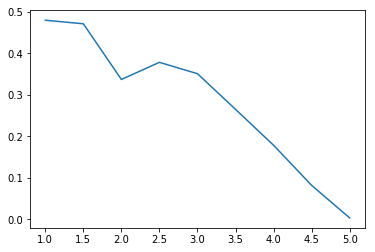

In [112]:
plt.plot(beta_values, np.array(random_entropy_values['0.100'])-np.array(entropy_values['0.100']))

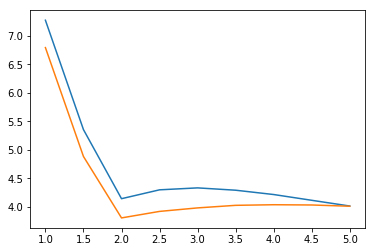

In [113]:
plt.plot(beta_values, np.array(random_entropy_values['0.100']))
plt.plot(beta_values, np.array(entropy_values['0.100']))